In [1]:
# Import libraries

import plotly.graph_objs as go
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from glob import glob
from ipywidgets import Video, Layout, VBox, HBox, HTML, widgets, interactive

task2idx_dict = {
    "vself": 0,
    "vmin": 1,
    "vmax": 2,
    "headneck": 3,
    "dtspeech": 4,
    "dtmath": 5,
    "dtcarry": 6,
    "ec": 7
}

pheno2idx_dict = {
    "aengstliches Gangbild": 0,
    "antalgisches Gangbild": 1,
    "ataktisches Gangbild": 2,
    "dyskinetisches Gangbild": 3,
    "funktionelles Gangbild": 4,
    "gesundes Gangbild": 5,
    "hypokinetisch-frontales Gangbild": 6,
    "hypokinetisches Gangbild": 7,
    "motorisch-kognitives Gangbild": 8,
    "paretisches Gangbild": 9,
    "sensorisch-ataktisches Gangbild": 10,
    "spastisch-ataktisches Gangbild": 11,
    "spastisches Gangbild": 12
}

pheno2idx_dict = {k.replace(" ", "\n"): v for k, v in pheno2idx_dict.items()}

direction2idx_dict = {
    "Unknown":0,
    "Towards":1,
    "Away":2
}

idx2direction_dict = {v: k for k, v in direction2idx_dict.items()}

idx2pheno_dict = {v: k for k, v in pheno2idx_dict.items()}

idx2task_dict = {v: k for k, v in task2idx_dict.items()}

def idx2task(idx):
    return idx2task_dict[idx]

def idx2pheno(idx):
    return idx2pheno_dict[idx]

def idx2direction(idx):
    return idx2direction_dict[idx]

def tick_val_text_tasks():
    vals = list(idx2task_dict.keys())
    texts = [idx2task(i) for i in vals]
    return (vals, texts)

def tick_val_text_phenos():
    vals = list(idx2pheno_dict.keys())
    texts = [idx2pheno(i) for i in vals]
    return (vals, texts)

def tick_val_text_directions():
    vals = list(idx2direction_dict.keys())
    texts = [idx2direction(i) for i in vals]
    return (vals, texts)

def write_df_pickle(df, write_path):
    with open(write_path, "wb") as fh:
        pickle.dump(df, fh)
        
def load_df_pickle(df_path):
    with open(df_path, "rb") as fh:
        try:
            loaded_df = pickle.load(fh, encoding='latin1')
            # loaded_df = pickle.load(fh, encoding='utf-8')
        except TypeError:
            loaded_df = pickle.load(fh)
    return loaded_df


In [2]:
# initialize values
data_dir = "data/"

# Cond-Direct-Ident
videos_data_dir = os.path.join(data_dir, "videos/Ident_complete_Cond_Direct/")
videos_name_common = "Ident_complete_Cond_Direct_{}.mp4"
df_name = "model_outputs_full_final.pickle"
df_ph_name = "model_phenos_outputs_full_final.pickle"

display_columns = ["task_text", "pheno_text", "direction_text"]

# Load data
df = load_df_pickle(os.path.join(data_dir, df_name))
df_ph = load_df_pickle(os.path.join(data_dir, df_ph_name))
df["task_text"] = df.task.apply(idx2task)
df["pheno_text"] = df.pheno.apply(idx2pheno)
df["direction_text"] = df.direction.apply(idx2direction)

# Arrange data
num_vids = len(glob(os.path.join(videos_data_dir, "*.mp4")))
df = df.iloc[0:num_vids]
pl = np.stack(df_ph['pheno_umap'])

# Display data
print("Dataframe's shape = ", df.shape)
print("Dataframe's coloumns = \n", df.columns)
print("Pheno dataframe's columns = \n", df_ph.columns)
print("Available number of videos = ", num_vids)
display(df.head())
print(pl.shape[0])

Dataframe's shape =  (8000, 43)
Dataframe's coloumns = 
 Index(['B+C+T+P_fut_recon', 'B+C+T+P_pred_task', 'B+C+T+P_recon',
       'B+C+T+P_task_latent', 'B+C+T+P_tl_umap', 'B+C+T+P_z',
       'B+C+T+P_z_logvar', 'B+C+T+P_z_mu', 'B+C+T+P_z_umap', 'B+C+T_fut_recon',
       'B+C+T_pred_task', 'B+C+T_recon', 'B+C+T_task_latent', 'B+C+T_tl_umap',
       'B+C+T_z', 'B+C+T_z_logvar', 'B+C+T_z_mu', 'B+C+T_z_umap',
       'B+C_fut_recon', 'B+C_recon', 'B+C_z', 'B+C_z_logvar', 'B+C_z_mu',
       'B+C_z_umap', 'B_fut_recon', 'B_recon', 'B_z', 'B_z_logvar', 'B_z_mu',
       'B_z_umap', 'direction', 'idpatients', 'ori_fut', 'ori_fut_mask',
       'ori_motion', 'ori_motion_mask', 'pheno', 'pheno_mask', 'task',
       'task_mask', 'task_text', 'pheno_text', 'direction_text'],
      dtype='object')
Pheno dataframe's columns = 
 Index(['pheno_labels', 'pheno_latent', 'pheno_pred', 'pheno_umap'], dtype='object')
Available number of videos =  37372


,B+C+T+P_fut_recon,B+C+T+P_pred_task,B+C+T+P_recon,B+C+T+P_task_latent,B+C+T+P_tl_umap,B+C+T+P_z,B+C+T+P_z_logvar,B+C+T+P_z_mu,B+C+T+P_z_umap,B+C+T_fut_recon,...,ori_fut_mask,ori_motion,ori_motion_mask,pheno,pheno_mask,task,task_mask,task_text,pheno_text,direction_text
0,"[[-0.005403633, -0.005782837, -0.01328471, -0....",2,"[[0.0041791303, 0.0027246848, 0.0023756642, 0....","[4.422009, -10.808443, 9.887892, -5.584319, -0...","[1.9330963, -3.1134365]","[1.8247871, -0.24781245, 0.3538451, 0.7987048,...","[-0.24614118, 0.0066785635, 0.34127486, -0.302...","[0.6426649, -0.2509504, -0.019039154, -0.13126...","[-2.660494, 0.6098321]","[[-0.048308372, -0.04686241, -0.04192491, -0.0...",...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-0.028436855140284323, -0.026266701641764867...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",7,True,2,True,vmax,hypokinetisches\nGangbild,Away
1,"[[-0.0029618796, 0.0013357056, 0.00047212653, ...",6,"[[-0.026358522, -0.026427645, -0.026373006, -0...","[-4.8182597, -35.011944, 1.2252113, -9.364414,...","[1.0208888, -4.881366]","[0.5185084, -1.0680901, -0.43168682, -0.607159...","[-0.2138134, 0.19460617, -0.7219981, -0.787570...","[0.028656024, -0.5893218, -0.24311003, 0.24704...","[2.0045521, 2.508829]","[[-0.0043126196, -0.0028802622, -0.005967131, ...",...,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[[0.01062969743198594, 0.010724052885837665, 0...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",7,True,6,True,dtcarry,hypokinetisches\nGangbild,Towards
2,"[[0.0027243635, 0.0019885506, -0.003015508, -0...",0,"[[0.00039624702, 0.00085618626, 0.0006407732, ...","[9.3632145, -11.559011, -6.6779027, 3.4724119,...","[-0.6247737, -2.798308]","[-1.5085664, 0.8404697, 1.1731671, -0.5765711,...","[-0.26214468, 0.17003313, -0.08594677, -0.5253...","[0.14653835, 0.13951015, -0.108023606, -0.1831...","[1.363318, 0.18504468]","[[0.0014380105, 0.0021287221, 0.0031723324, 0....",...,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[[0.010106534796549549, 0.013536286862665281, ...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",7,True,0,True,vself,hypokinetisches\nGangbild,Towards
3,"[[-0.008604117, -0.010764537, -0.014353235, -0...",4,"[[0.004250196, 0.0013320092, -0.002313978, -0....","[4.7014613, 6.468915, -23.563213, -7.7546406, ...","[-1.4163122, 1.548552]","[-1.0385858, 1.0068494, -1.1358384, 1.6080668,...","[-0.114033416, -0.08547528, 0.11325493, -0.317...","[-0.11035376, 0.026120242, -0.28727785, 0.2306...","[-0.40285984, 0.9726552]","[[-0.021970542, -0.023594111, -0.019640135, -0...",...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-0.06827504722776229, -0.07004049406243834, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",7,True,1,True,vmin,hypokinetisches\nGangbild,Away
4,"[[-0.023139108, -0.024042655, -0.030705117, -0...",7,"[[-0.0016101906, 0.00027520303, 0.00017222017,...","[-3.2962456, -0.67077047, -18.253214, 0.038001...","[-4.987249, -0.8179119]","[1.323111, -0.1301859, -1.2075124, -1.2815115,...","[-0.189119, -0.021895938, 0.14587484, -0.07956...","[0.14975089, 0.020304142, -0.5121495, 0.392244...","[-1.5923724, 0.04717212]","[[-0.036845237, -0.04051301, -0.0334426, -0.03...",...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-0.03203433030739011, -0.03208959801032618, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",7,True,3,True,headneck,hypokinetisches\nGangbild,Away


938


In [3]:
# Adjustment to get df in df_ph dimensions, df_ph combines all information per patient. 
# Only the first movie/task of each patient is kept in df for visualization. 
pat_ids = np.array(list(df["idpatients"]))
phe_mask = np.array(list(df["pheno_mask"]))
pat_ids_compr = pat_ids[phe_mask==True]
uni_pat_ids = np.unique(pat_ids_compr)
vid_idx = np.zeros(uni_pat_ids.shape)

for idx, val in enumerate(uni_pat_ids):
    vid_idx[idx] = np.array(np.where(pat_ids==val))[0,0]
    
vid_idx = vid_idx.astype(int)

df = df.iloc[vid_idx]
    
print("Dataframe's shape = ", df.shape)

Dataframe's shape =  (938, 43)


In [4]:
# # This section is for widget initialization

# Load video data and widget
video_data = dict()
for idx, val in enumerate(vid_idx):
    video_path = os.path.join(videos_data_dir, videos_name_common.format(val))
    with open(video_path, "rb") as f:
        b = f.read()
        video_data[idx] = b
        
video_widget = Video(
    value = video_data[0],
    layout=Layout(height='250px', width='800px')
)

# Set HTML widget for data frames
details = HTML(
    value = df[display_columns].iloc[0].to_frame().to_html()
)

# Dropdown menu for plotting type ("tasks" or "phenotypes")
plot_type_widget = widgets.Dropdown(
    options=["Phenotypes"],
    value="Phenotypes",
    description="Plot Types:",
)

# Dropdown menu for focusing on certain labels
focus_label_widget = widgets.Dropdown(
    options=["ALL"] + tick_val_text_phenos()[1],
    value="ALL",
    description="Label focus:",
)

# Slider for opacity
def set_opacity(focus_opacity, nonfocus_opacity):
    set_relevant_opacity(scatter, 
                         plot_type_widget.value, 
                         focus_label_widget.value, 
                         focus_opacity, 
                         nonfocus_opacity)

opacity_slider = interactive(set_opacity,
                             focus_opacity=(0.0, 1.0, 0.01),
                             nonfocus_opacity=(0.0, 1.0, 0.01),
                             )


In [6]:
def scatter_plot_type(scatter, plot_type):
    
    if plot_type == "phenos":
        target_text = df["pheno_text"]
        target_tick_func = tick_val_text_phenos
        target_color = df_ph["pheno_labels"]
    scatter.text = target_text
    scatter.marker.color = target_color
    scatter.marker.colorbar = dict(
        title = plot_type,
        tickvals = target_tick_func()[0],
        ticktext = target_tick_func()[1],
        ticks = 'outside'
    )
    scatter.marker.colorscale = "Jet"
    
def set_relevant_opacity(scatter, plot_type, focus_label, focus_opacity, nonfocus_opacity):
    alphas = np.zeros(df.shape[0])
    if plot_type == "Phenotypes":
        if focus_label == "ALL":
            alphas[:] = focus_opacity
        else:
            pheno_index = pheno2idx_dict[focus_label]
            alphas[df_ph["pheno_labels"]==pheno_index] = focus_opacity
            alphas[df_ph["pheno_labels"]!=pheno_index] = nonfocus_opacity
        
    scatter.marker.opacity = alphas
    
    
def hover_fn(trace, points, state):
    
    # Fetch the hovered point
    ind = points.point_inds[0]
    
    # Update entry in shown dataframe
    details.value = df[display_columns].iloc[ind].to_frame().to_html()
    
    # Update image widget
    video_widget.value = video_data[ind]

def plot_type_response(change):
    if plot_type_widget.value == "Phenotypes":
        scatter_plot_type(scatter, "phenos")
        focus_label_widget.options = ["ALL"] + tick_val_text_phenos()[1]
        focus_label_widget.value = "ALL"

def focus_label_response(change):
    set_relevant_opacity(scatter, 
                         plot_type_widget.value, 
                         focus_label_widget.value, 
                         opacity_slider.children[0].value,
                         opacity_slider.children[1].value)


opacity_slider.children[0].layout.width = '300px'
opacity_slider.children[1].layout.width = '300px'
opacity_slider.children[0].description = 'Focus alpha'
opacity_slider.children[1].description = 'Other alpha'

        
fig = go.FigureWidget(
    data=[
        dict(
            type='scattergl',
            x=pl[:,0],
            y=pl[:,1],
            mode='markers',
        )
    ],
)

fig.layout.titlefont.size = 12
fig.layout.xaxis.title = "x"
fig.layout.yaxis.title = "y"
fig.layout.autosize = False
fig.layout.width, fig.layout.height = 600, 600
fig.layout.hovermode = 'closest'

scatter = fig.data[0]
scatter.hoverinfo = "text"
scatter_plot_type(scatter, "phenos")
scatter.marker.size = 8


scatter.on_hover(hover_fn)
plot_type_widget.observe(plot_type_response, names="value")
focus_label_widget.observe(focus_label_response, names="value")
VBox([video_widget, HBox([fig, VBox([plot_type_widget, focus_label_widget, opacity_slider, details])])])



In [12]:
df.pheno_text.value_counts()

ataktisches\nGangbild                9548
hypokinetisches\nGangbild            7249
hypokinetisch-frontales\nGangbild    5566
sensorisch-ataktisches\nGangbild     4399
gesundes\nGangbild                   2899
spastisch-ataktisches\nGangbild      1844
aengstliches\nGangbild               1829
funktionelles\nGangbild              1497
motorisch-kognitives\nGangbild        998
paretisches\nGangbild                 568
spastisches\nGangbild                 402
dyskinetisches\nGangbild              296
antalgisches\nGangbild                277
Name: pheno_text, dtype: int64

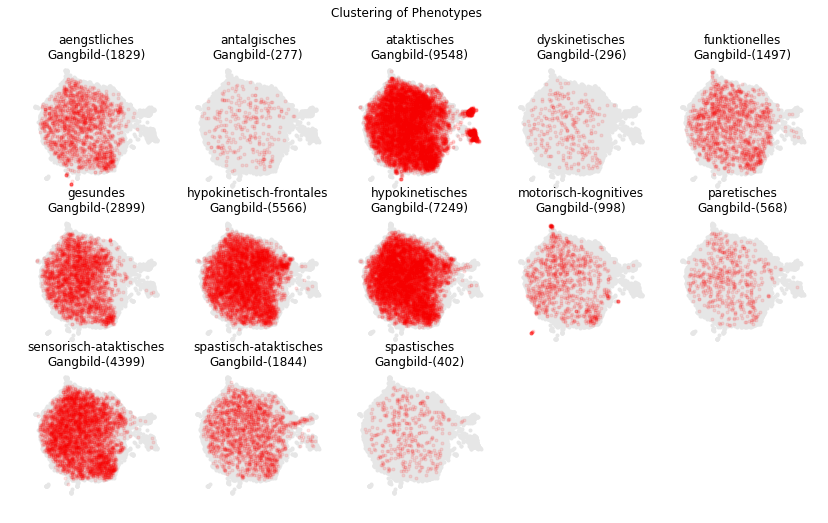

In [13]:
def plot_phenos_fingerprints(df, plot_title):
    all_phenos_vec = np.zeros((df.shape[0], 13))
    for i in range(df.shape[0]):
        phenos_list = np.asarray(df.iloc[i]["phenotype"]).astype(np.int)
        all_phenos_vec[i, phenos_list] = 1

    fingerprints = np.asarray(list(df["motion_z_umap"]))
    fig, ax = plt.subplots(3, 5, figsize=(14,8))
    ax = ax.ravel()
    fig.suptitle(plot_title)
    for i in range(13):
        indexes_label = np.where(all_phenos_vec[:, i] == 1)
        indexes_not_label = np.where(all_phenos_vec[:, i] != 1)
        ax[i].scatter(fingerprints[indexes_not_label[0], 0], fingerprints[indexes_not_label[0], 1], c="0.9", marker=".")
        ax[i].scatter(fingerprints[indexes_label[0], 0], fingerprints[indexes_label[0], 1], c="r", marker=".", alpha=0.1)
        title = "%s-(%d)" % (idx2pheno(i), indexes_label[0].shape[0])
        ax[i].set_title(title.replace(" ", "\n"))
        ax[i].axis("off")
    for i in [13, 14]:
        ax[i].axis("off")
    plt.savefig("phenos_task_conditionals.png", dpi=300)

plot_phenos_fingerprints(df, "Clustering of Phenotypes")

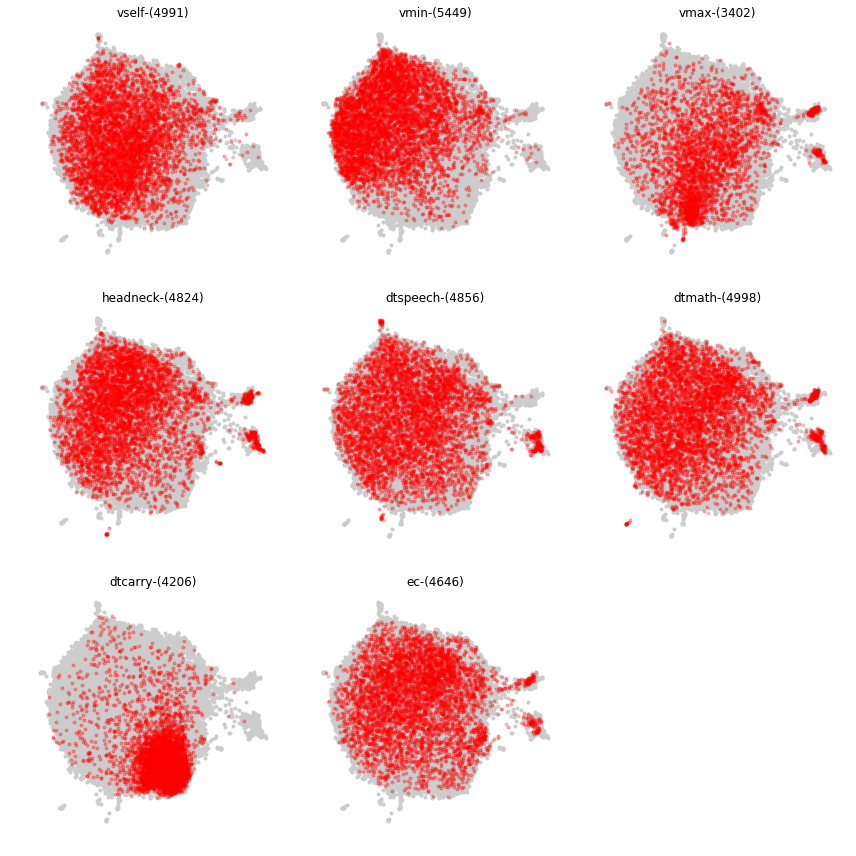

In [14]:
def plot_task_fingerprints(df, plot_title):
    all_phenos_vec = np.zeros((df.shape[0], 13))
    for i in range(df.shape[0]):
        phenos_list = np.asarray(df.iloc[i]["task"]).astype(np.int)
        all_phenos_vec[i, phenos_list] = 1

    fingerprints = np.asarray(list(df["motion_z_umap"]))
    fig, ax = plt.subplots(3, 3, figsize=(12,12))
    ax = ax.ravel()
    fig.suptitle(plot_title)
    for i in range(9):
        if i == 8:
            ax[i].axis("off")
        else:
            indexes_label = np.where(all_phenos_vec[:, i] == 1)
            indexes_not_label = np.where(all_phenos_vec[:, i] != 1)
            ax[i].scatter(fingerprints[indexes_not_label[0], 0], fingerprints[indexes_not_label[0], 1], c="0.8", marker=".")
            ax[i].scatter(fingerprints[indexes_label[0], 0], fingerprints[indexes_label[0], 1], c="r", marker=".", alpha=0.3)
            title = "%s-(%d)" % (idx2task(i), indexes_label[0].shape[0])
            ax[i].set_title(title.replace(" ", "\n"))
            ax[i].axis("off")
    plt.tight_layout()
    plt.savefig("tasks_task_conditionals.png", dpi=300)

plot_task_fingerprints(df, "")